##将质量特征转换为英文

In [1]:
import pandas as pd

# 读取数据

data = pd.read_excel("D:/研究生论文/小论文2/代码/04质量评估_Ising模型/01质量评估/01节点质量/桃花马上请长缨RAG/all_node_energy.xlsx")


# 替换内容的映射字典
#动漫
'''
replacement_mapping = {
    
    "视觉效果": "Visual Effect",
    "听觉效果": "Audio Effect",
    "剧情吸引度": "Plot Attractiveness",
    "世界观": "Worldview",
    "人物设计": "Character Design",
    "动作表现": "Action Performance",
    "整体创新性": "Overall Innovation",
    "整体适应性": "Overall Adaptability",
    "氛围营造": "Atmosphere Creation",
    "人物发展": "Character Development",
    "节奏控制": "Pace Control",
    "情感表达": "Emotional Expression"
}
'''

#微短剧
replacement_mapping = {
    
    "文化深度": "Cultural Depth",
    "剧情合理性": "Plot Rationality",
    "叙事节奏": "Narrative Pacing",
    "角色表现": "Character Performance",
    "动作场面呈现": "Action Scene Presentation",
    "服化道匹配度": "Consistency of Costume, Makeup, and Props",
    "台词质量": "Dialogue Quality",
    "音效与配乐": "Sound Effects and Music"
}

#新能源汽车
'''
replacement_mapping = {
    "空间": "Space",
    "驾驶感受": "Driving Experience",
    "续航": "Endurance",
    "外观": "Appearance",
    "内饰": "Interior",
    "性价比": "Cost Performance",
    "智能化": "Intelligence"
}
'''


# 替换 'Node Name' 列内容
data['Node Name'] = data['Node Name'].map(replacement_mapping)


# 保存处理后的数据到新文件
data.to_excel("D:/研究生论文/小论文2/代码/04质量评估_Ising模型/01质量评估/01节点质量/桃花马上请长缨RAG/all_node_energy_english.xlsx", index=False)

# 打印处理后的数据
print("替换完成，并已保存到文件 'all_node_energy_english.xlsx' 中。")
print(data)


替换完成，并已保存到文件 'all_node_energy_english.xlsx' 中。
                                     Node Name  Node Energy  Episode
0                               Cultural Depth     0.064225        1
1                             Plot Rationality    -0.199767        1
2                             Narrative Pacing     0.112390        1
3    Consistency of Costume, Makeup, and Props     0.172910        1
4                      Sound Effects and Music     0.108546        1
..                                         ...          ...      ...
553                           Plot Rationality    -0.502151       91
554                           Narrative Pacing    -0.360656       91
555  Consistency of Costume, Makeup, and Props    -0.203662       91
556                    Sound Effects and Music    -0.401533       91
557                      Character Performance    -0.730613       91

[558 rows x 3 columns]


###体验品数据合并

In [3]:
import pandas as pd

# 文件路径
file_paths = [
    "D:/研究生论文/小论文2/代码/04质量评估_Ising模型/01质量评估/01节点质量/三体RAG/all_node_energy_english.xlsx",
    "D:/研究生论文/小论文2/代码/04质量评估_Ising模型/01质量评估/01节点质量/无限世界RAG/all_node_energy_english.xlsx",
    "D:/研究生论文/小论文2/代码/04质量评估_Ising模型/01质量评估/01节点质量/她不当女主很多年RAG/all_node_energy_english.xlsx"
]

# 要提取的特征名称
feature_names = ['三体', '无限世界', '她不当女主很多年']

# 读取第一个文件作为基础
base_data = pd.read_excel(file_paths[0], usecols=['Node Name', 'Node Energy', 'Episode'])
base_data.columns = ['NodeName', f'NodeEnergy_{feature_names[0]}', 'Episode']

# 逐个读取文件并合并信息
for idx, file_path in enumerate(file_paths[1:]):
    data = pd.read_excel(file_path, usecols=['Node Name', 'Node Energy', 'Episode'])
    data.columns = ['NodeName', f'NodeEnergy_{feature_names[idx + 1]}', 'Episode']
    base_data = pd.merge(base_data, data, on=['NodeName', 'Episode'], how='outer')

# 将合并的数据保存到新的 Excel 文件中
output_file = "D:/研究生论文/小论文2/代码/04质量评估_Ising模型/01质量评估/01节点质量/merged_node_info_初始.xlsx"
base_data.to_excel(output_file, index=False)

print(f"合并的信息已保存到 {output_file}")


合并的信息已保存到 D:/研究生论文/小论文2/代码/04质量评估_Ising模型/01质量评估/01节点质量/merged_node_info-1.xlsx


: 

###后面内容不用

###折线图

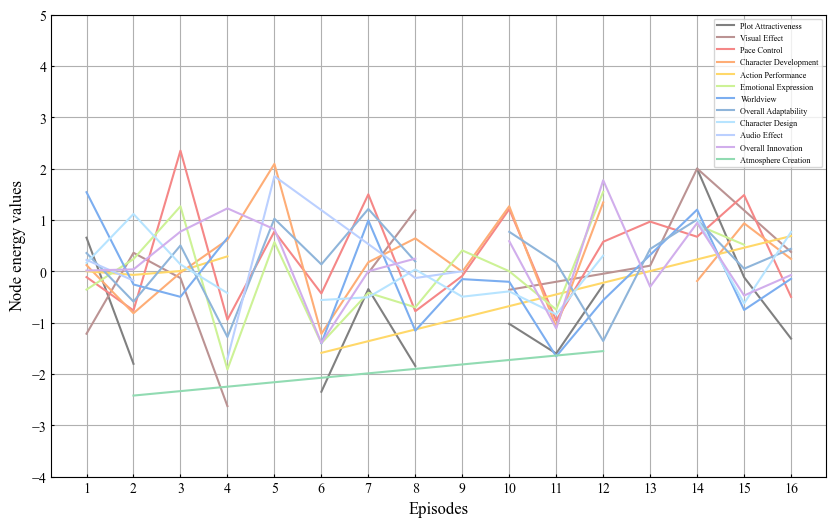

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 读取数据
data = pd.read_excel("D:/研究生论文/小论文2/代码/04质量评估_Ising模型/01质量评估/01节点质量/她不当女主很多年RAG/all_node_energy_english.xlsx")

# 获取唯一的特征名称
features = data['Node Name'].unique()

# 创建图形
plt.figure(figsize=(10, 6))

# 指定颜色列表
colors = [
    (128/255, 128/255, 128/255),  # color1
    (187/255, 147/255, 147/255),  # color2
    (245/255, 135/255, 135/255),  # color3
    (254/255, 173/255, 118/255),  # color4
    (255/255, 216/255, 105/255),  # color5
    (205/255, 242/255, 150/255),  # color6
    (124/255, 174/255, 240/255),  # color7
    (143/255, 181/255, 218/255),  # color8
    (183/255, 228/255, 255/255),  # color9
    (187/255, 208/255, 255/255),  # color10
    (209/255, 174/255, 236/255),  # color11
    (145/255, 219/255, 178/255),  # color12
    
]

# 绘制每个特征的折线图
for i, feature in enumerate(features):
    feature_data = data[data['Node Name'] == feature]
    plt.plot(feature_data['Episode'], feature_data['Node Energy'], label=feature, color=colors[i])

# 添加图例
plt.legend(loc='upper right', prop={'family': 'Times New Roman', 'size': 6})

# 设置坐标轴标签
plt.xlabel('Episodes', fontname='Times New Roman', fontsize=12)
plt.ylabel('Node energy values', fontname='Times New Roman', fontsize=12)

# 设置坐标轴刻度字体和大小
plt.xticks(range(int(data['Episode'].min()), int(data['Episode'].max()) + 1, 1), fontname='Times New Roman', fontsize=10)
plt.yticks(fontname='Times New Roman', fontsize=10)

# 设置刻度朝内，并且刻度线长度为3
plt.tick_params(axis='both', which='both', direction='in', length=2)

# 设置 y 轴刻度间隔为 100，朝内
plt.yticks(np.arange(-4, 6, 1), fontname='Times New Roman', fontsize=10)

# 设置坐标轴范围
#plt.ylim(-6, 6)

# 移除网格线
plt.grid(True)


#plt.savefig('E:/桌面/代码/04质量评估_Ising模型/02可视化/三体4.8-节点质量.tiff', format='tiff', dpi=500)

# 显示图形
plt.show()


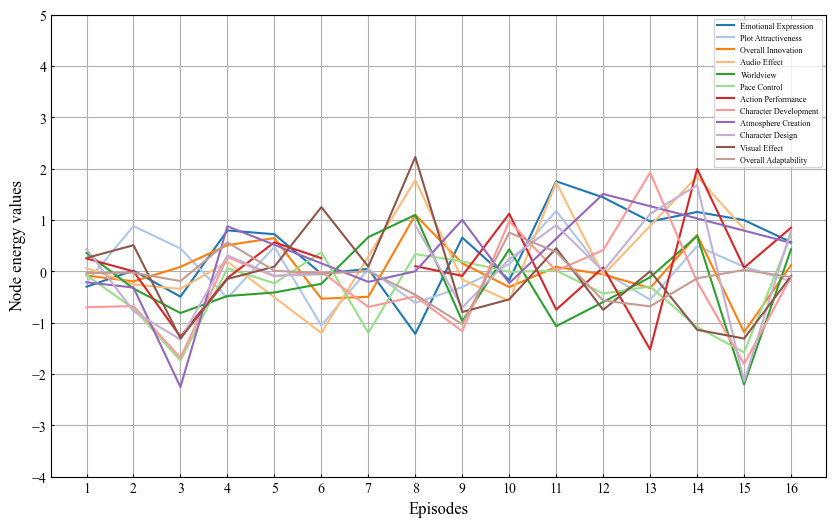

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 读取数据
data = pd.read_excel("D:/研究生论文/小论文2/代码/04质量评估_Ising模型/01质量评估/01节点质量/无限世界RAG/all_node_energy_english.xlsx")

# 获取唯一的特征名称
features = data['Node Name'].unique()

# 创建图形
plt.figure(figsize=(10, 6))

# 使用更多颜色循环
color_cycle = plt.cm.tab20.colors

# 绘制每个特征的折线图
for i, feature in enumerate(features):
    feature_data = data[data['Node Name'] == feature]
    plt.plot(feature_data['Episode'], feature_data['Node Energy'], label=feature, color=color_cycle[i])

# 添加图例
plt.legend(loc='upper right', prop={'family': 'Times New Roman', 'size': 6})

# 设置坐标轴标签
plt.xlabel('Episodes', fontname='Times New Roman', fontsize=12)
plt.ylabel('Node energy values', fontname='Times New Roman', fontsize=12)

# 设置坐标轴刻度字体和大小
plt.xticks(range(int(data['Episode'].min()), int(data['Episode'].max()) + 1, 1), fontname='Times New Roman', fontsize=10)
plt.yticks(fontname='Times New Roman', fontsize=10)

# 设置刻度朝内，并且刻度线长度为3
plt.tick_params(axis='both', which='both', direction='in', length=2)

# 设置 y 轴刻度间隔为 100，朝内
plt.yticks(np.arange(-4, 6, 1), fontname='Times New Roman', fontsize=10)

# 设置坐标轴范围
#plt.ylim(-6, 6)

# 移除网格线
plt.grid(True)

# 添加标题
#plt.title('Visualization of Merged Results', fontname='Times New Roman', fontsize=14)

#plt.savefig('D:/研究生论文/小论文2/代码/04质量评估_Ising模型/02可视化/无限世界RAG-节点质量.tiff', format='tiff', dpi=500)

# 显示图形
plt.show()


###2.每集质量可视化

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取数据
df = pd.read_excel("D:/研究生论文/小论文2/代码/04质量评估_Ising模型/01质量评估/02整集质量/三体4.8_total_energy.xlsx")

# 提取Episode和Total Energy列的数据
episode = df["Episode"]
total_energy = df["Total Energy"]

# 绘制折线图
plt.figure(figsize=(10, 6))
plt.plot(episode, total_energy, marker='o', linestyle='-')

# 隐藏坐标轴刻度
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)

# 设置坐标轴标签
plt.xlabel('Episodes', fontname='Times New Roman', fontsize=12)
plt.ylabel('Quality values', fontname='Times New Roman', fontsize=12)

# 设置坐标轴刻度字体和大小
plt.xticks(range(int(df['Episode'].min()), int(df['Episode'].max()) + 1, 1), fontname='Times New Roman', fontsize=10)
plt.yticks(fontname='Times New Roman', fontsize=10)

# 设置坐标轴范围
#plt.ylim(-0.7, 1.2)

# 移除网格线
#plt.grid(False)

# 显示网格
plt.grid(True)

plt.savefig('D:/研究生论文/小论文2/代码/04质量评估_Ising模型/02可视化/三体_整集质量.tiff', format='tiff', dpi=500)

# 显示图形
plt.show()


循环遍历文件夹-节点质量

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# 定义数据文件夹路径
folder_path = r"D:\研究生论文\小论文2\代码\04质量评估_Ising模型\01质量评估\01节点质量"  

# 获取文件夹中所有文件夹名称
subfolders = [subfolder for subfolder in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, subfolder))]

# 遍历每个作品文件夹
for subfolder in subfolders:
    # 拼接all_node_energy.xlsx的完整路径
    file_path = os.path.join(folder_path, subfolder, "all_node_energy.xlsx")
    
    # 读取数据
    data = pd.read_excel(file_path)
    
    # 获取唯一的节点名称
    nodes = data['Node Name'].unique()
    
    # 创建图形
    plt.figure(figsize=(10, 6))
    
    # 绘制每个节点的折线图
    for node in nodes:
        node_data = data[data['Node Name'] == node]
        plt.plot(node_data['Episode'], node_data['Node Energy'], label=node)
    
    # 添加图例
    plt.legend(loc='upper right', prop={'family': 'Times New Roman', 'size': 8})
    
    # 设置坐标轴标签
    plt.xlabel('Episodes', fontname='Times New Roman', fontsize=12)
    plt.ylabel('Node quality values', fontname='Times New Roman', fontsize=12)
    
    # 设置坐标轴刻度字体和大小，刻度线朝内，刻度线长度为3
    plt.xticks(fontname='Times New Roman', fontsize=10)
    plt.yticks(fontname='Times New Roman', fontsize=10)
    plt.tick_params(axis='both', which='both', direction='in', length=2)

    # 设置 y 轴刻度间隔为 100，朝内
    plt.yticks(np.arange(-1500, 1501, 100), fontname='Times New Roman', fontsize=10)

    # 设置坐标轴范围
    plt.ylim(-1600, 1600)
    
    # 添加标题
    #plt.title(f'{subfolder} - Node Quality', fontname='Times New Roman', fontsize=14)
    
    # 保存图像
    plt.savefig(os.path.join(folder_path, subfolder, f"{subfolder}_node_quality.tiff"), format='tiff', dpi=500)

    plt.savefig(os.path.join('D:/研究生论文/小论文2/代码/04质量评估_Ising模型/02可视化', subfolder, f"{subfolder}_node_quality.tiff"), format='tiff', dpi=500)
    
    # 显示图形
    plt.show()
